In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, gcf

demand_final.csv Analysis

In [ ]:
demand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Repo/demand_final.csv')
demand

,Time,Day ahead forecast,Hour ahead forecast,Current demand
0,00:00,21112.0,20527.0,20564.0
1,00:05,20262.0,20395.0,20510.0
2,00:10,20262.0,20395.0,20447.0
3,00:15,20262.0,20395.0,20335.0
4,00:20,20262.0,20160.0,20206.0
...,...,...,...,...
316739,23:40,22096.0,21565.0,21537.0
316740,23:45,22096.0,21565.0,21503.0
316741,23:50,22096.0,21258.0,21364.0
316742,23:55,22096.0,21258.0,21295.0


In [ ]:
demand.describe().T

,count,mean,std,min,25%,50%,75%,max
Day ahead forecast,316696.0,24953.181370,4945.713411,15053.0,21406.0,23951.0,26951.0,50485.0
Hour ahead forecast,316720.0,24834.930974,4852.501422,0.0,21370.0,23883.0,26824.0,47697.0
Current demand,315929.0,24824.908473,4865.267098,-2651.0,21354.0,23867.0,26810.0,72922.0


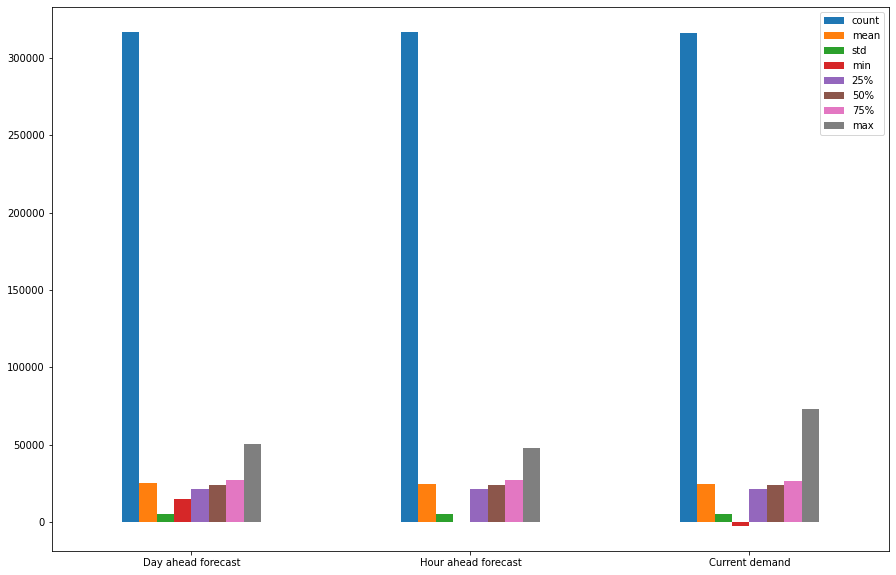

In [11]:
demand.describe().T.plot.bar(rot=0, figsize=(15, 10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


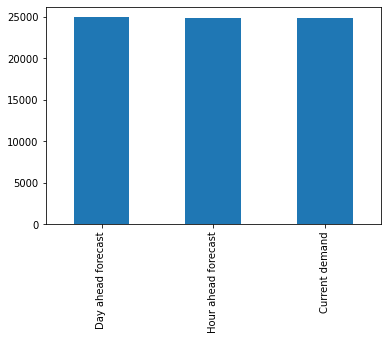

In [12]:
demand.mean().plot(kind='bar')
# average = demand.mean()
# average.name = 'average'
# demand = demand.append(average)

In [ ]:
X = demand.drop('Time', axis=1)
X

,Day ahead forecast,Hour ahead forecast,Current demand
0,21112.0,20527.0,20564.0
1,20262.0,20395.0,20510.0
2,20262.0,20395.0,20447.0
3,20262.0,20395.0,20335.0
4,20262.0,20160.0,20206.0
...,...,...,...
316739,22096.0,21565.0,21537.0
316740,22096.0,21565.0,21503.0
316741,22096.0,21258.0,21364.0
316742,22096.0,21258.0,21295.0


In [ ]:
# bring alla my data in same scale.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X

array([[0.17100361, 0.4303625 , 0.30718643],
       [0.147014  , 0.42759503, 0.30647189],
       [0.147014  , 0.42759503, 0.30563826],
       ...,
       [0.19877512, 0.44568841, 0.31777222],
       [0.19877512, 0.44568841, 0.3168592 ],
       [0.19877512, 0.44568841,        nan]])

In [ ]:
feature_names = ['Day ahead forecast',	'Hour ahead forecast',	'Current demand']

In [ ]:
feature_df = pd.DataFrame(X, columns=feature_names)
target = feature_df.iloc[:,0]
Features = feature_df.iloc[:,1:]

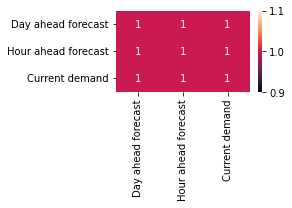

In [ ]:
# Map Visualization.

import seaborn as sn

feat_num = len(feature_names)

plt.figure(figsize=(feat_num,feat_num/2))
corrMatrix = feature_df.corr().round(1)
sn.heatmap(corrMatrix, annot=True)

# plt.tight_layout()
    
plt.show()

sources_final.csv Analysis

In [18]:
sources = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Repo/sources_final.csv')
sources

,Time,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Other,Natural Gas,Large Hydro
0,00:00,0.0,3381.0,964.0,217.0,183.0,453.0,10.0,2283.0,4286.0,3912.0,-3.0,5950.0,0.0,NaN,NaN
1,00:05,0.0,3403.0,964.0,217.0,183.0,452.0,10.0,2282.0,4069.0,3899.0,80.0,6143.0,0.0,NaN,NaN
2,00:10,0.0,3463.0,964.0,219.0,184.0,420.0,10.0,2283.0,3687.0,4060.0,48.0,6171.0,0.0,NaN,NaN
3,00:15,0.0,3455.0,965.0,219.0,183.0,422.0,9.0,2282.0,3545.0,3996.0,-68.0,6460.0,0.0,NaN,NaN
4,00:20,0.0,3440.0,965.0,220.0,184.0,421.0,9.0,2280.0,3600.0,3934.0,-51.0,6460.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315636,23:35,2.0,3426.0,966.0,301.0,223.0,445.0,14.0,2272.0,3028.0,4046.0,8.0,6394.0,0.0,NaN,NaN
315637,23:40,2.0,3325.0,967.0,299.0,222.0,445.0,14.0,2273.0,2887.0,4047.0,15.0,6465.0,0.0,NaN,NaN
315638,23:45,2.0,3250.0,965.0,300.0,222.0,447.0,14.0,2272.0,2846.0,4041.0,25.0,6522.0,0.0,NaN,NaN
315639,23:50,2.0,3213.0,966.0,300.0,223.0,446.0,15.0,2273.0,2817.0,4054.0,58.0,6453.0,0.0,NaN,NaN


In [21]:
sources.describe().T

,count,mean,std,min,25%,50%,75%,max
Solar,315605.0,3560.486640,4373.681632,-145.0,-34.0,114.0,7969.0,13191.0
Wind,315605.0,2021.717102,1300.609731,-2476.0,869.0,1833.0,3053.0,36275.0
Geothermal,315317.0,890.270645,115.980026,-134.0,866.0,909.0,958.0,1134.0
Biomass,315605.0,311.255481,48.244031,125.0,279.0,315.0,344.0,499.0
Biogas,315605.0,212.566677,15.383061,101.0,204.0,213.0,222.0,267.0
Small hydro,315605.0,264.014062,778.092909,-2826.0,166.0,227.0,338.0,431490.0
Coal,315605.0,14.244201,4.574618,-8.0,11.0,15.0,18.0,30.0
Nuclear,315605.0,1866.848678,578.829856,-74.0,1145.0,2259.0,2269.0,2290.0
Natural gas,274128.0,8101.118149,4043.165588,-280718.0,5169.0,7764.0,10178.0,26540.0
Large hydro,274416.0,2001.957641,1312.828403,-576.0,960.0,1682.0,2900.0,6362.0


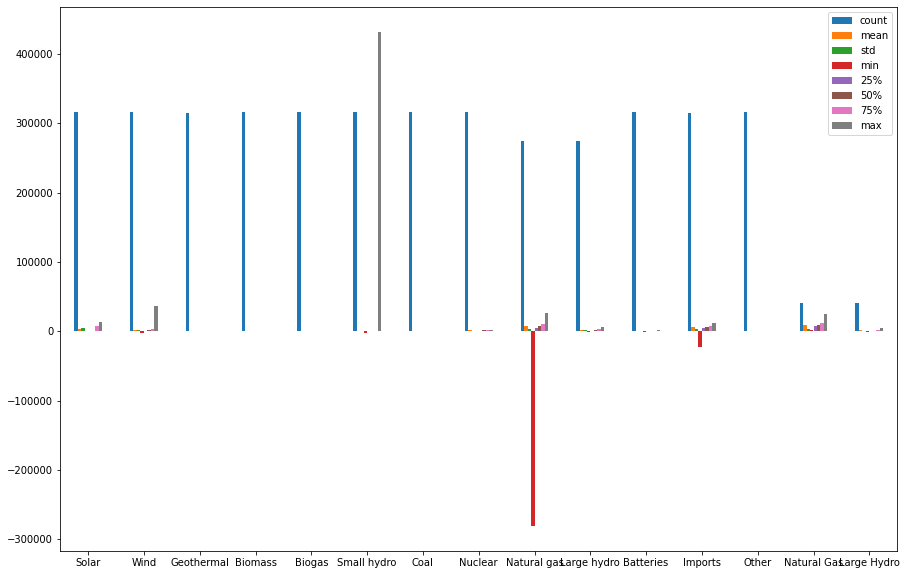

In [38]:
sources.describe().T.plot.bar(rot=0, figsize=(15, 10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


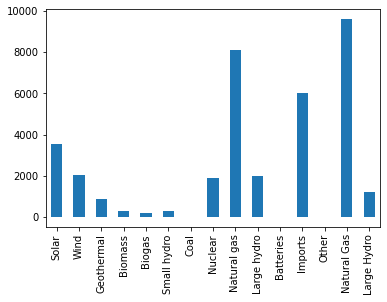

In [40]:
sources.mean().plot(kind='bar')

In [49]:
Y = sources.drop('Time', axis=1)
Y

,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural gas,Large hydro,Batteries,Imports,Other,Natural Gas,Large Hydro
0,0.0,3381.0,964.0,217.0,183.0,453.0,10.0,2283.0,4286.0,3912.0,-3.0,5950.0,0.0,NaN,NaN
1,0.0,3403.0,964.0,217.0,183.0,452.0,10.0,2282.0,4069.0,3899.0,80.0,6143.0,0.0,NaN,NaN
2,0.0,3463.0,964.0,219.0,184.0,420.0,10.0,2283.0,3687.0,4060.0,48.0,6171.0,0.0,NaN,NaN
3,0.0,3455.0,965.0,219.0,183.0,422.0,9.0,2282.0,3545.0,3996.0,-68.0,6460.0,0.0,NaN,NaN
4,0.0,3440.0,965.0,220.0,184.0,421.0,9.0,2280.0,3600.0,3934.0,-51.0,6460.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315636,2.0,3426.0,966.0,301.0,223.0,445.0,14.0,2272.0,3028.0,4046.0,8.0,6394.0,0.0,NaN,NaN
315637,2.0,3325.0,967.0,299.0,222.0,445.0,14.0,2273.0,2887.0,4047.0,15.0,6465.0,0.0,NaN,NaN
315638,2.0,3250.0,965.0,300.0,222.0,447.0,14.0,2272.0,2846.0,4041.0,25.0,6522.0,0.0,NaN,NaN
315639,2.0,3213.0,966.0,300.0,223.0,446.0,15.0,2273.0,2817.0,4054.0,58.0,6453.0,0.0,NaN,NaN


In [57]:
# Scaling process.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Y)
Y = scaler.transform(Y)
Y

array([[0.01087283, 0.15114449, 0.8659306 , ..., 0.        ,        nan,
               nan],
       [0.01087283, 0.15171221, 0.8659306 , ..., 0.        ,        nan,
               nan],
       [0.01087283, 0.15326056, 0.8659306 , ..., 0.        ,        nan,
               nan],
       ...,
       [0.0110228 , 0.14776393, 0.86671924, ..., 0.        ,        nan,
               nan],
       [0.0110228 , 0.14680911, 0.86750789, ..., 0.        ,        nan,
               nan],
       [0.01087283, 0.14655106, 0.86750789, ..., 0.        ,        nan,
               nan]])

In [53]:
feature_names = ['Solar',	'Wind',	'Geothermal',	'Biomass',	'Biogas',	'Small hydro',	'Coal',	'Nuclear',	'Natural gas',	'Large hydro',	'Batteries',
                 'Imports',	'Other', 'Natural Gas',	'Large Hydro']

In [54]:
feature_df = pd.DataFrame(Y, columns=feature_names)
target = feature_df.iloc[:,0]
Features = feature_df.iloc[:,1:]

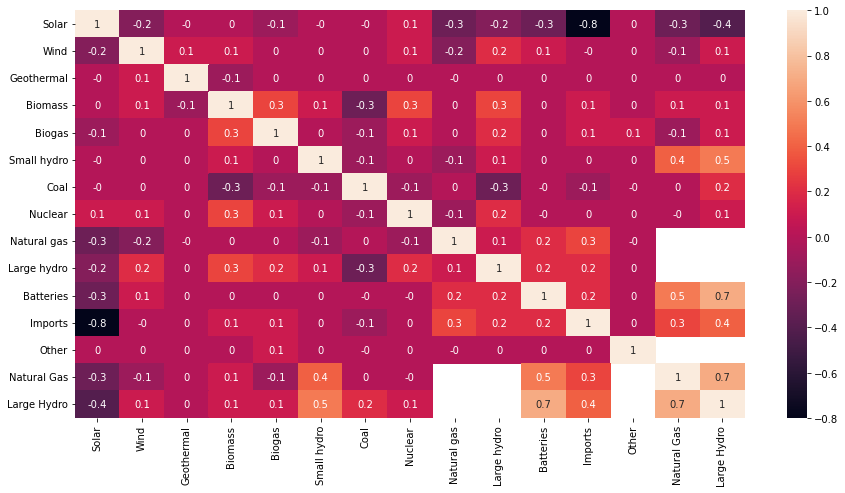

In [55]:
# Map Visualization.
import seaborn as sn

feat_num = len(feature_names)
plt.figure(figsize=(feat_num,feat_num/2))
corrMatrix = feature_df.corr().round(1)
sn.heatmap(corrMatrix, annot=True)
# plt.tight_layout()
    
plt.show()